In [120]:
using DifferentialEquations
using LinearAlgebra
using Plots
using FileIO, JLD2

In [121]:
include("Solvers.jl")
include("PlotFunctions.jl")
include("UsefulFunctions.jl")
include("PointGenerators.jl")

PointsOnSphere (generic function with 2 methods)

In [168]:
θ, μ, β = 10, 28, 8/3
p = [θ, μ, β]
Δt = 0.1
N = 600

600

In [169]:
xint= [-50, 50]
dx = 10
yint = [-50, 50]
dy = 10
zint = [-30, 70]
dz = 10

initial_points = PointsInCuboid(dx, xint, dy, yint, dz, zint);
num = length(initial_points)

1331

In [207]:
Ma = []
l = length(initial_points)
k = l
for x₀ = initial_points[1:k]
    sol = zeros(3,N+1)
    sol[:,1] = x₀
    for i = 1:N
        t = Δt*i
        prob = ODEProblem(LorentzSystem,x₀,(0,t),p);
        X1 = solve(prob, RadauIIA5(), adaptive=true);
        sol[:,i+1] = X1.u[end]
    end
    push!(Ma, sol)
end

if k<l
    for m = k+1:l
        push!(Ma, zeros(3,N+1))
    end
end

In [197]:
size(Ma)

(1331,)

In [198]:
Mtrue = FileIO.load(raw"Variables\Radau1E-5.jld2","M");

In [203]:
Ma[20]

3×601 Matrix{Float64}:
 -50.0  -3.45284  19.7711    8.71477  …  -4.93274   -7.09843  -10.6532
 -40.0  34.3136   28.2536  -11.2746      -6.15809  -10.1727   -14.1179
  50.0  16.9534   44.4219   44.6935      20.4036    19.9017    25.1176

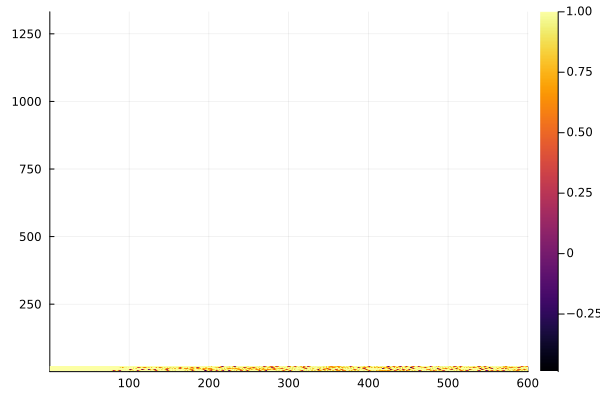

In [206]:
M = CorrelationMatrix(Ma, Mtrue, l, N)
heatmap(M)